# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [36]:
# Import your libraries:

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import sys
# print(sys.path)
# Adding a path so that it finds the package for numpy
sys.path.append('/usr/local/lib/python3.7/site-packages')
import numpy as np
import pandas as pd
from scipy import stats

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The dataset is located [here](https://drive.google.com/file/d/1z1gYSD32ktbHuKSzB5JVS_u4YsLibh5F/view?usp=sharing), please download it and place it in the data folder.

In [37]:
# loading the data:

customers = pd.read_csv('../data/Wholesale_customer_data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [38]:
# Your code here:

customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
def spot_nan(df):
    
    dict_count = {}
    
    for col in df.columns:
        count_nan = df[col].isna().sum()
        dict_count[col] = count_nan
        
    return dict_count

spot_nan(customers)
#Paolo: this works but you could compact the code, see below


{'Channel': 0,
 'Region': 0,
 'Fresh': 0,
 'Milk': 0,
 'Grocery': 0,
 'Frozen': 0,
 'Detergents_Paper': 0,
 'Delicassen': 0}

In [47]:
#Paolo: spotting NaN
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

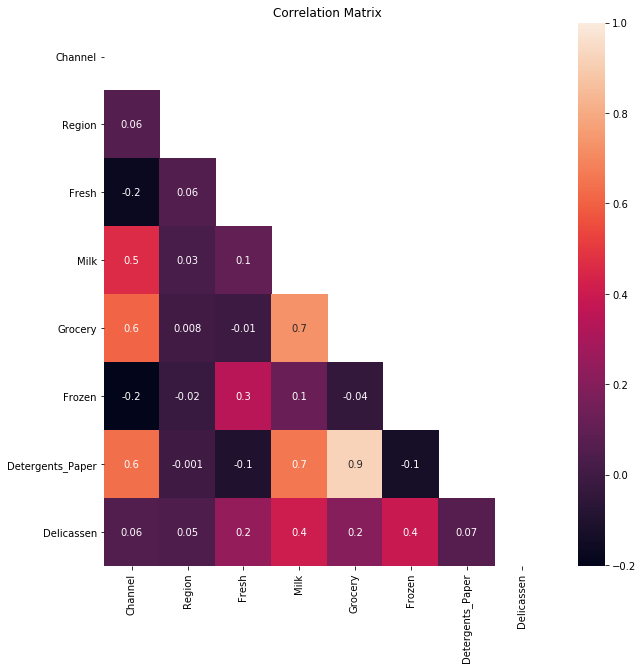

In [48]:
plt.subplots(figsize=(10,10))

corr = customers.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, annot = True, fmt='.1g')
plt.title('Correlation Matrix')
plt.show()

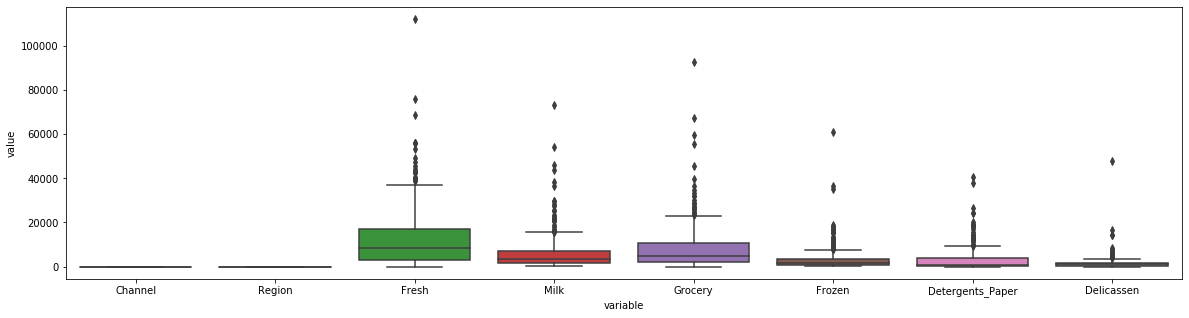

In [8]:
plt.subplots(figsize=(20,5))
sns.boxplot(x="variable", y="value", data=pd.melt(customers))
#Paolo: good idea the box plot

In [49]:
summary = customers.describe()
summary = summary.round()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0
Region,440.0,3.0,1.0,1.0,2.0,3.0,3.0,3.0
Fresh,440.0,12000.0,12647.0,3.0,3128.0,8504.0,16934.0,112151.0
Milk,440.0,5796.0,7380.0,55.0,1533.0,3627.0,7190.0,73498.0
Grocery,440.0,7951.0,9503.0,3.0,2153.0,4756.0,10656.0,92780.0
Frozen,440.0,3072.0,4855.0,25.0,742.0,1526.0,3554.0,60869.0
Detergents_Paper,440.0,2881.0,4768.0,3.0,257.0,816.0,3922.0,40827.0
Delicassen,440.0,1525.0,2820.0,3.0,408.0,966.0,1820.0,47943.0


In [50]:
customers.drop(['Channel'], axis=1, inplace=True)
customers.drop(['Region'], axis=1, inplace=True)

In [51]:
outliers = customers[stats.zscore(customers) > 3]
#Paolo: Be careful when you remove datapoints you do not much about
outliers.drop_duplicates()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
39,56159,555,902,10002,212,2916
47,44466,54259,55571,7782,24171,6465
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
71,18291,1266,21042,5373,4173,14472
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903
87,43265,5025,8117,6312,1579,14351


In [12]:
len(outliers.drop_duplicates())

26

In [52]:
for col in customers.columns:
    print(col)
    pareto = customers[customers[col] > customers[col].quantile(.80)]
    print(pareto[col].sum() / customers[col].sum())
#Paolo:ok

Fresh
0.5267331435526884
Milk
0.5605415241866138
Grocery
0.5568736526607218
Frozen
0.6238138571375726
Detergents_Paper
0.697065994035605
Delicassen
0.5738937584861903


In [ ]:
# Your observations here


# The database includes the sales by customer of a series of categories, plus two catgorical: Channel And Region
# No missing values
# The data has low collinearity, only Grocery and Detergent Paper sales are highly correlated
# Visually, there are some outliers, especially on the high end, likely some extreme spenders
# Indeed, there are 26 outliers based on Zscore value > 3 = extreme right of the distribution
# Top 20% of customer generate between 50 to 70% of category sales

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [53]:
# Your code here

customers = pd.read_csv('../data/Wholesale_customer_data.csv')
customers = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           414 non-null    int64
 1   Region            414 non-null    int64
 2   Fresh             414 non-null    int64
 3   Milk              414 non-null    int64
 4   Grocery           414 non-null    int64
 5   Frozen            414 non-null    int64
 6   Detergents_Paper  414 non-null    int64
 7   Delicassen        414 non-null    int64
dtypes: int64(8)
memory usage: 29.1 KB


In [15]:
# Your comment here

# I removed the outliers because these are few selected high spenders which should be treated individually and not pollute the cluster analysis
# I have not removed any column because despite the collinearity, keeping both grocery and detergent paper sales is more face valid


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [54]:
# Your import here:

from sklearn import preprocessing

# Your code here:

colnames = [col for col in customers.columns]
scaler = preprocessing.StandardScaler()
customer_scale = scaler.fit_transform(customers)
customer_scale = pd.DataFrame(customer_scale)
customer_scale.columns = colnames
customer_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.478044,0.587722,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291
1,1.478044,0.587722,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510
2,1.478044,0.587722,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937
3,-0.676570,0.587722,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379
4,1.478044,0.587722,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130
...,...,...,...,...,...,...,...,...
409,-0.676570,0.587722,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505
410,-0.676570,0.587722,2.907639,-0.756220,-0.938230,0.672844,-0.711549,0.911288
411,1.478044,0.587722,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350
412,-0.676570,0.587722,-0.043004,-0.635345,-0.710575,-0.518989,-0.688147,0.729534


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [55]:
# Your code here:
from sklearn.cluster import KMeans
cluster_model = KMeans()
cluster_model.fit(customer_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
customers['labels'] = cluster_model.predict(customer_scale)
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,6
4,2,3,22615,5410,7198,3915,1777,5185,5


Count the values in `labels`.

In [19]:
# Your code here:

customers.groupby(['labels']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
0,17,17,17,17,17,17,17,17
1,130,130,130,130,130,130,130,130
2,67,67,67,67,67,67,67,67
3,36,36,36,36,36,36,36,36
4,12,12,12,12,12,12,12,12
5,70,70,70,70,70,70,70,70
6,43,43,43,43,43,43,43,43
7,39,39,39,39,39,39,39,39


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [57]:
# Your code here

from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5).fit(customer_scale)
clustering
customers['labels_DBSCAN'] = clustering.fit_predict(customer_scale)
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,6,-1
4,2,3,22615,5410,7198,3915,1777,5185,5,-1


Count the values in `labels_DBSCAN`.

In [58]:
# Your code here

customers.groupby(['labels_DBSCAN']).count()
#Paolo: -1 means it identifies those istances as noise, does not cluster them properly
# check here https://scikit-learn.org/stable/modules/clustering.html#dbscan

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,343,343,343,343,343,343,343,343,343
0,71,71,71,71,71,71,71,71,71


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [59]:
def scatter_make(df, x, y):
    fig, [ax1, ax2] = plt.subplots(1,2, figsize = (15,4))
    ax1.scatter(df[x], df['labels'], color='blue')
    ax1.set_title('K-Means')   
    ax1.set_xlabel(x)     
    ax1.set_ylabel('K-Means Clusters')   

    ax2.scatter(df['labels_DBSCAN'], customers[y], color='red')
    ax2.set_title('DBSCAN')
    ax2.set_xlabel('DBSCAN Clusters')
    ax2.set_ylabel(y)

    return plt.show()
#Paolo: this is not the best way to visualize it, check below

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (16,6))

ax1.scatter(x=customers['Frozen'], y=customers['Delicassen'], c=customers['labels'])
ax1.set_title('K-Means')
ax1.set_xlabel('Frozen')
ax1.set_ylabel('Delicassen')

ax2.scatter(x=customers['Frozen'], y=customers['Delicassen'], c=customers['labels_DBSCAN'])
ax2.set_title('DBSCAN')
ax2.set_xlabel('Frozen')
ax2.set_ylabel('Delicassen')

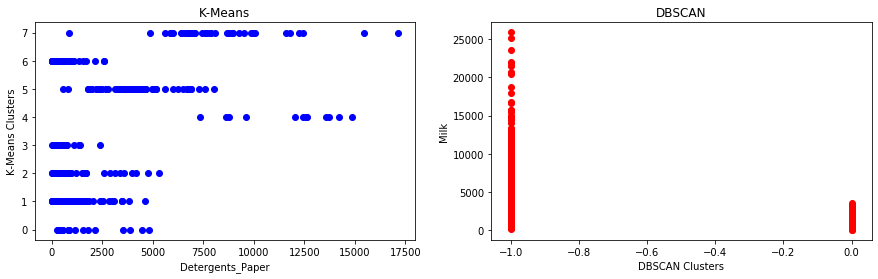

In [23]:
scatter_make(customers, 'Detergents_Paper','Milk')

In [82]:
#Paolo: this is an alternative way to visualize it, the standard way is as suggested
# in the text, check here

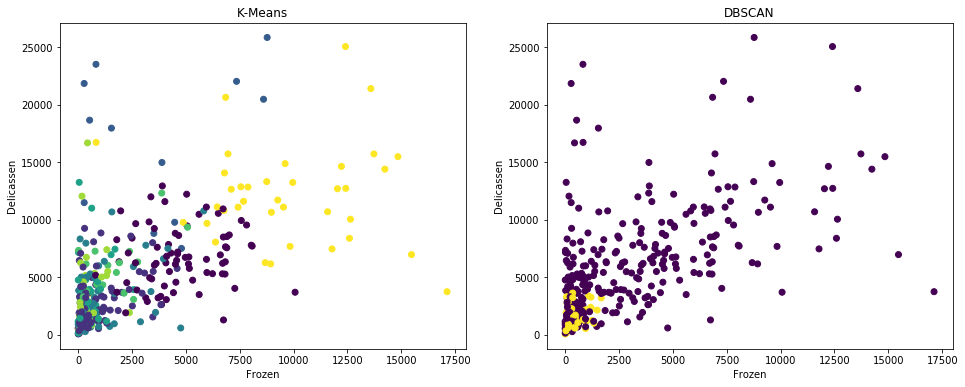

In [83]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (16,6))

ax1.scatter(x=customers['Detergents_Paper'],\
            y=customers['Milk'], c=customers['labels'],cmap='viridis')
ax1
ax1.set_title('K-Means')
ax1.set_xlabel('Frozen')
ax1.set_ylabel('Delicassen')

ax2.scatter(x=customers['Detergents_Paper'], y=customers['Milk'], c=customers['labels_DBSCAN'])
ax2.set_title('DBSCAN')
ax2.set_xlabel('Frozen')
ax2.set_ylabel('Delicassen');

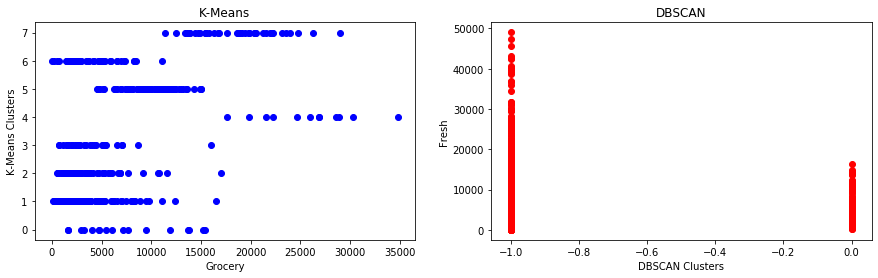

In [24]:
scatter_make(customers, 'Grocery','Fresh')

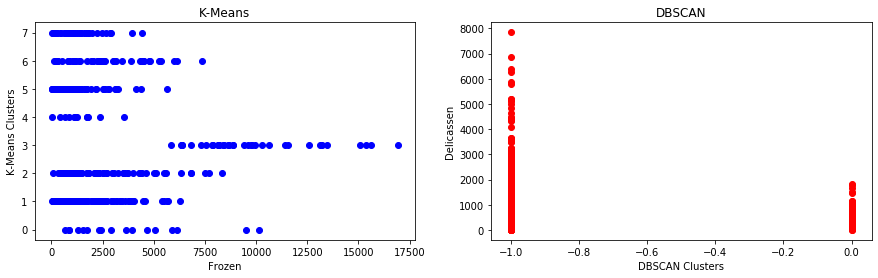

In [25]:
scatter_make(customers, 'Frozen','Delicassen')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [26]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [27]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [76]:
# Your code here:

kmean = customers.groupby(['labels']).mean()
DBSCAN = customers.groupby(['labels_DBSCAN']).mean()


In [77]:
kmean.round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,2.0,3.0,7518.0,6681.0,10476.0,1166.0,4700.0,1125.0,-1.0
1,1.0,3.0,6437.0,2380.0,3086.0,1606.0,687.0,736.0,-0.0
2,2.0,2.0,7744.0,16914.0,13409.0,3373.0,3741.0,5243.0,-1.0
3,1.0,1.0,10333.0,2796.0,3871.0,2546.0,919.0,894.0,-1.0
4,1.0,3.0,30905.0,3181.0,3617.0,2656.0,555.0,1115.0,-1.0
5,1.0,3.0,15940.0,5608.0,6887.0,2293.0,1575.0,3585.0,-1.0
6,1.0,3.0,15602.0,3622.0,3861.0,9952.0,512.0,1330.0,-1.0
7,2.0,2.0,5634.0,12219.0,21516.0,1452.0,9722.0,1314.0,-1.0


In [78]:
# To better assess the clusters, I retrieve the percentile of each mean from the original distribution

percentile_fresh = [stats.percentileofscore(customers['Fresh'],mean) for mean in kmean['Fresh']]
percentile_milk = [stats.percentileofscore(customers['Milk'],mean) for mean in kmean['Milk']]
percentile_grocery = [stats.percentileofscore(customers['Grocery'],mean) for mean in kmean['Grocery']]
percentile_frozen = [stats.percentileofscore(customers['Frozen'],mean) for mean in kmean['Frozen']]
percentile_Detergent = [stats.percentileofscore(customers['Detergents_Paper'],mean) for mean in kmean['Detergents_Paper']]
percentile_delicassen = [stats.percentileofscore(customers['Delicassen'],mean) for mean in kmean['Delicassen']]
channel = kmean['Channel']
region = kmean['Region']


In [79]:
# I then create a new DF with the above values (+ original Channel and Region for which it makes no sense to calculate the percentile)

percentile_KMean = pd.DataFrame(data=percentile_fresh)
percentile_KMean.columns = ['Fresh']
percentile_KMean['Milk'] = percentile_milk
percentile_KMean['Grocery'] = percentile_grocery
percentile_KMean['Frozen'] = percentile_frozen
percentile_KMean['Detergents_Paper'] = percentile_Detergent
percentile_KMean['Delicassen'] = percentile_delicassen
percentile_KMean['Channel'] = channel
percentile_KMean['Region'] = region
                    

In [80]:
def color_df(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 40:
    color = 'red'
  elif value > 60:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [81]:
percentile_KMean = percentile_KMean.round()
percentile_KMean.style.applymap(color_df, subset=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,48.000000,74.000000,77.000000,43.000000,82.000000,60.000000,2.000000,3.000000
1,43.000000,40.000000,40.000000,53.000000,48.000000,44.000000,1.000000,3.000000
2,48.000000,98.000000,85.000000,76.000000,75.000000,99.000000,2.000000,2.000000
3,59.000000,43.000000,47.000000,69.000000,55.000000,50.000000,1.000000,1.000000
4,95.000000,46.000000,45.000000,70.000000,44.000000,59.000000,1.000000,3.000000
5,75.000000,67.000000,64.000000,64.000000,62.000000,95.000000,1.000000,3.000000
6,74.000000,52.000000,47.000000,97.000000,43.000000,65.000000,1.000000,3.000000
7,39.000000,93.000000,95.000000,50.000000,96.000000,65.000000,2.000000,2.000000


In [34]:
# From the above table, w/o going into the details, you can tell that the clusters have a good logic in differentiating consumers.
# E.g. cl. 0 is very high in Deli sales like # 7 but belongs to different region and channel
# E.g. 5 and 7 are similar but one has very low Fresh sales, the other higher Frozen sales.

In [35]:
DBSCAN.round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.0,2.0,11642.0,5565.0,7823.0,2782.0,2780.0,1377.0,4.0
0,1.0,3.0,6219.0,1521.0,1940.0,1429.0,411.0,566.0,1.0


Which algorithm appears to perform better?

In [ ]:
# DBSCAN identifies only two clusters, differentiating very low spenders across all categories from everyone else.

In [ ]:
#Paolo: it is not easy because it is an unsupervised problem we do not have a test set.
# However for example the dbscan has labelled a lot of data as (-1) which means that it   
# identifies many samples as noise, cannot cluster them properly. You could play with some
# of the parameters (eps, min_samples) to see what changes.
# See here https://scikit-learn.org/stable/modules/clustering.html#dbscan

# For Kmeans you could play with K and use the 'elbow method' to choose the optimal k. Have a look here 
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here